In [297]:
import csv

```
with open("G:\\My Drive\\4b - Courses\\6 - Projects\\US e-Commerce\\Dataset\\US  E-commerce records 2020.csv","r") as eCommerce:
    readers = csv.DictReader(eCommerce)

with open("eCommerce.txt","w",newline="") as output:
    writer = csv.DictWriter(output,fieldnames=readers.fieldnames)
    writer.writeheader()

with open("G:\\My Drive\\4b - Courses\\6 - Projects\\US e-Commerce\\Dataset\\US  E-commerce records 2020.csv","r") as eCommerce:
    reader = csv.DictReader(eCommerce)
    for row in reader:
        with open("eCommerce.txt","a",newline="") as output:
            writer = csv.DictWriter(output, readers.fieldnames)
            writer.writerow(row)
```

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [299]:
df = pd.read_csv(r'G:\My Drive\4b - Courses\6 - Projects\US e-Commerce\Dataset\US_E_commerce_records_2020.csv', encoding='windows-1252')
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [300]:
df.isna().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [301]:
df.duplicated().sum()

0

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [303]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [304]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [305]:
print(f'Min Date: {df["Order Date"].min()}')
print(f'Max Date: {df["Order Date"].max()}')
print(f'Date Difference: {df["Order Date"].max() - df["Order Date"].min()}')

Min Date: 2020-01-01 00:00:00
Max Date: 2020-12-30 00:00:00
Date Difference: 364 days 00:00:00


In [306]:
df['Txn Month'] = df['Order Date'].apply(lambda x: dt.datetime(x.year, x.month, 1))
df['1st Txn Month'] = pd.to_datetime(df.groupby(df['Customer ID'])['Txn Month'].transform('min'))

In [307]:
# df['Profit'].groupby(df['State']).sum()
# df.groupby(df['State']).sum()
# df.groupby(['Customer ID'])['Txn Month'].min()
# df['Txn Month'].groupby(df['Customer ID']).min()
# df.groupby(['Customer ID'])['Txn Month'].apply('min')
# df.groupby(df['Customer ID'])['Txn Month'].transform('min')

In [308]:
def month_diff(start,end):
    return (end.dt.year - start.dt.year) * 12 + end.dt.month - start.dt.month

df['Month Diff'] = month_diff(df['1st Txn Month'], df['Txn Month'])

In [309]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Txn Month,1st Txn Month,Month Diff
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,2020-01-01,2020-01-01,0
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,2020-01-01,2020-01-01,0
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,2020-01-01,2020-01-01,0
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,2020-01-01,2020-01-01,0
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,2020-01-01,2020-01-01,0


In [310]:
# print(pd.Series(df['Customer ID'][(df['1st Txn Month']=='2020-01-01') & (df['Month Diff'] == 0) & (df['Segment'] == 'Consumer')]).count())
# print(pd.Series(df['Customer ID'][(df['1st Txn Month']=='2020-01-01') & (df['Month Diff'] == 0) & (df['Segment'] == 'Consumer')]).nunique())
# df.groupby(['1st Txn Month', 'Month Diff'])['Customer ID'].nunique().reset_index()

In [311]:
# df_c = df.groupby(['1st Txn Month', 'Month Diff'])['Customer ID'].apply(pd.Series.nunique).reset_index()
df_c = df.groupby(['1st Txn Month', 'Month Diff'])['Customer ID'].nunique().reset_index()
df_c.head()

,1st Txn Month,Month Diff,Customer ID
0,2020-01-01,0,67
1,2020-01-01,1,3
2,2020-01-01,2,8
3,2020-01-01,3,13
4,2020-01-01,4,9


In [312]:
# monthly cohorts
df_c.pivot(index=['1st Txn Month'], columns=['Month Diff'], values=['Customer ID'])

Customer ID                                                  \
Month Diff             0     1     2     3     4     5     6     7     8    
1st Txn Month                                                               
2020-01-01           67.0   3.0   8.0  13.0   9.0   4.0   9.0   9.0  16.0   
2020-02-01           50.0   6.0   6.0   6.0   7.0   4.0   6.0  17.0  10.0   
2020-03-01          101.0  13.0  15.0  13.0  15.0  14.0  27.0  20.0  27.0   
2020-04-01           77.0  12.0  15.0  13.0  12.0  20.0  13.0  22.0  26.0   
2020-05-01           71.0   9.0  10.0  12.0  17.0  11.0  26.0  17.0   NaN   
2020-06-01           70.0   6.0  12.0  18.0  12.0  17.0  15.0   NaN   NaN   
2020-07-01           45.0   7.0   9.0   9.0  10.0  11.0   NaN   NaN   NaN   
2020-08-01           32.0   9.0   5.0  17.0   9.0   NaN   NaN   NaN   NaN   
2020-09-01           63.0   8.0  15.0   8.0   NaN   NaN   NaN   NaN   NaN   
2020-10-01           39.0   6.0   9.0   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-01           45.0  11.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-12-01           33.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                 
Month Diff       9     10    11  
1st Txn Month                    
2020-01-01      9.0  16.0  18.0  
2020-02-01     15.0  15.0   NaN  
2020-03-01     23.0   NaN   NaN  
2020-04-01      NaN   NaN   NaN  
2020-05-01      NaN   NaN   NaN  
2020-06-01      NaN   NaN   NaN  
2020-07-01      NaN   NaN   NaN  
2020-08-01      NaN   NaN   NaN  
2020-09-01      NaN   NaN   NaN  
2020-10-01      NaN   NaN   NaN  
2020-11-01      NaN   NaN   NaN  
2020-12-01      NaN   NaN   NaN

In [313]:
# New customers per month
df_n = df_c.loc[df_c['Month Diff'] == 0, ['1st Txn Month', 'Customer ID']].rename(columns={"Customer ID":"New Cx"})

In [314]:
df_r = pd.merge(df_c, df_n, how='left', on='1st Txn Month')
df_r.head()

,1st Txn Month,Month Diff,Customer ID,New Cx
0,2020-01-01,0,67,67
1,2020-01-01,1,3,67
2,2020-01-01,2,8,67
3,2020-01-01,3,13,67
4,2020-01-01,4,9,67


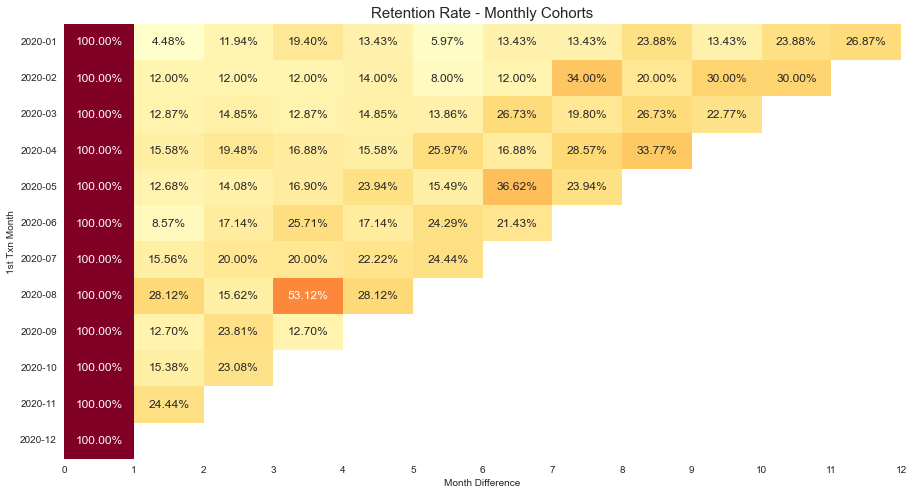

In [315]:
df_r['Retention Rate'] = df_r['Customer ID']/df_r['New Cx']
 
retention = df_r.pivot(index=['1st Txn Month'], columns=['Month Diff'], values=['Retention Rate'])
retention.index = retention.index.strftime("%Y-%m")
# retention.style.background_gradient('YlOrRd')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(retention, cmap = 'YlOrRd', annot = True, fmt = '.2%', annot_kws = {'fontsize': 12}, cbar = False, ax = ax)
plt.title('Retention Rate - Monthly Cohorts', fontsize=15)
plt.yticks(rotation = 0)
plt.xticks(range(13),range(13),rotation = 0)
plt.xlabel("Month Difference")
plt.show()

In [316]:
tx_Cohorts = retention['Retention Rate'].reset_index()
tx_Cohorts

Month Diff,1st Txn Month,0,1,2,3,4,5,6,7,8,9,10,11
0,2020-01,1.0,0.044776,0.119403,0.194030,0.134328,0.059701,0.134328,0.134328,0.238806,0.134328,0.238806,0.268657
1,2020-02,1.0,0.120000,0.120000,0.120000,0.140000,0.080000,0.120000,0.340000,0.200000,0.300000,0.300000,NaN
2,2020-03,1.0,0.128713,0.148515,0.128713,0.148515,0.138614,0.267327,0.198020,0.267327,0.227723,NaN,NaN
3,2020-04,1.0,0.155844,0.194805,0.168831,0.155844,0.259740,0.168831,0.285714,0.337662,NaN,NaN,NaN
4,2020-05,1.0,0.126761,0.140845,0.169014,0.239437,0.154930,0.366197,0.239437,NaN,NaN,NaN,NaN
5,2020-06,1.0,0.085714,0.171429,0.257143,0.171429,0.242857,0.214286,NaN,NaN,NaN,NaN,NaN
6,2020-07,1.0,0.155556,0.200000,0.200000,0.222222,0.244444,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-08,1.0,0.281250,0.156250,0.531250,0.281250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-09,1.0,0.126984,0.238095,0.126984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-10,1.0,0.153846,0.230769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


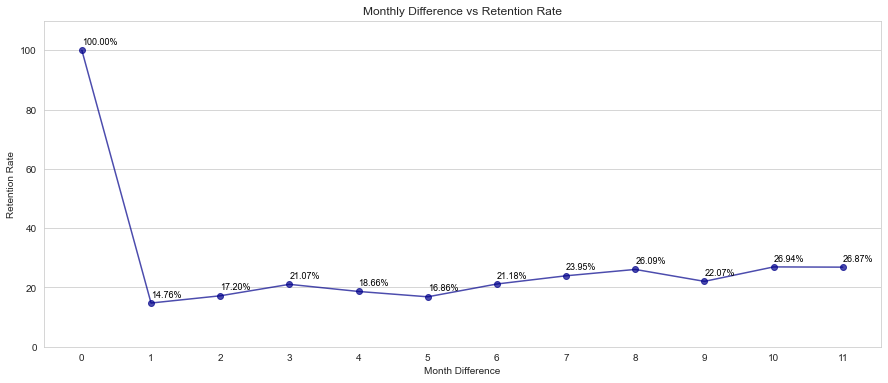

In [317]:
# Average of retention rates for each month_difference
y, x = [], []
for col in tx_Cohorts.columns[1:]:
    y.append(tx_Cohorts[col].apply('mean') * 100)
    x.append(int(col))

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x,y,'o-', c='darkblue', alpha = 0.7)

for x, y in zip(x,y):
    plt.text(x,y + 2, s= f'{y:.2f}%',fontdict={'size':9, 'color':'black'} )
ax.set_xlabel("Month Difference")
ax.set_ylabel("Retention Rate")
ax.set_ylim(0,110)
ax.set_xticks(range(12))
ax.set_title("Monthly Difference vs Retention Rate")
ax.grid(axis='x')
plt.show()

In [318]:
# Cumulative sum of all customers by 1st transaction month
Customer_per_month = df.groupby(['1st Txn Month'])['Customer ID'].nunique().values
Customer = Customer_per_month.cumsum()

# Count of new customers monthly
New_Cx = df_n['New Cx'].values

# Count of all unique customers per month
Total_Cx = df.groupby(df['Txn Month'])['Customer ID'].nunique().values

# Returning customers
Return_Cx = Total_Cx - New_Cx
(Return_Cx)

# Retention Rates per month
retention_rate = []
for i in range(len(Return_Cx)-1):
    retention_rate.append(round(Return_Cx[i+1] *100/Customer[i], 2))
retention_rate.insert(0,0)


In [319]:
print(Return_Cx)
print(Customer)
print(retention_rate)

[  0   3  14  32  42  48  57  72 133  97 171 162]
[ 67 117 218 295 366 436 481 513 576 615 660 693]
[0, 4.48, 11.97, 14.68, 14.24, 13.11, 13.07, 14.97, 25.93, 16.84, 27.8, 24.55]


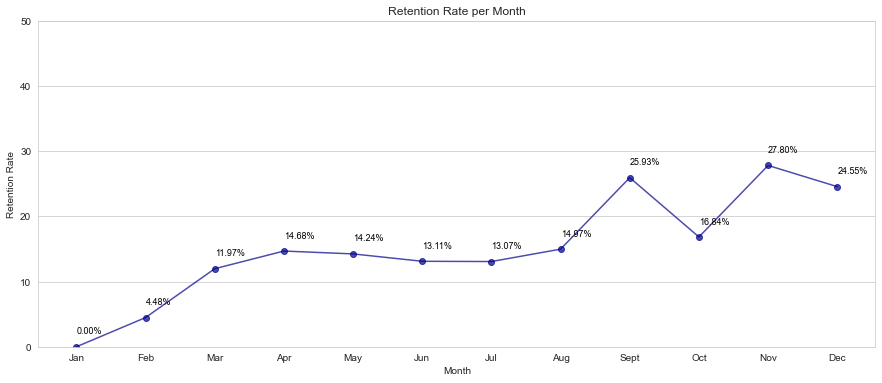

In [331]:
x = month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
y = retention_rate
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x,y,'o-', c='darkblue', alpha = 0.7)

for x, y in zip(x,y):
    plt.text(x,y + 2, s= f'{y:.2f}%',fontdict={'size':9, 'color':'black'} )
ax.set_xlabel("Month")
ax.set_ylabel("Retention Rate")
ax.set_ylim(0,50)
ax.set_title("Retention Rate per Month")
ax.grid(axis='x')
plt.show()

In [321]:
monthly_gross = df.groupby('Txn Month').agg({'Sales': 'sum','Customer ID': 'nunique'})
monthly_gross

,Sales,Customer ID
Txn Month,,
2020-01-01,43971.3740,67
2020-02-01,20301.1334,53
2020-03-01,58872.3528,115
2020-04-01,36521.5361,109
2020-05-01,44261.1102,113
2020-06-01,52981.7257,118
2020-07-01,45264.4160,102
2020-08-01,63120.8880,104
2020-09-01,87866.6520,196


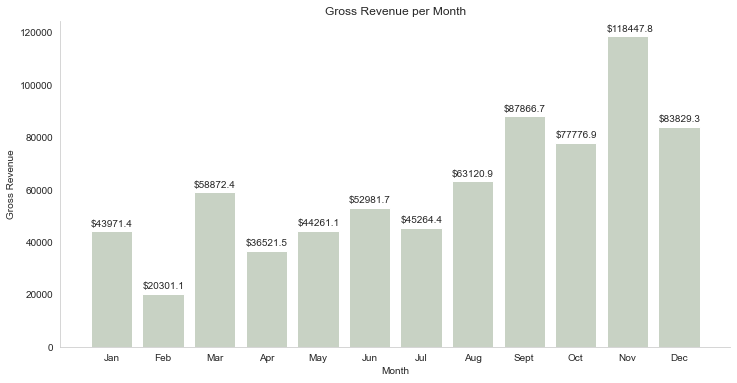

In [322]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(month, monthly_gross.Sales,  color = '#c8d2c4')
for x, y in enumerate(monthly_gross.Sales):
    ax.text(x-0.4, y+2000, s= f'${y:.1f}')
ax.set_xlabel("Month")
# ax.set_xticks(range(12),range(12))
ax.set_ylabel("Gross Revenue")
ax.set_yscale(value="linear")
ax.set_title("Gross Revenue per Month")
ax.grid(visible=False)
sns.despine(left = False, right = True, bottom = False, top = True)
plt.show()

In [323]:
monthly_net = df.groupby('Txn Month').agg({'Profit': 'sum','Customer ID': 'nunique'})
monthly_net

,Profit,Customer ID
Txn Month,,
2020-01-01,7140.4391,67
2020-02-01,1613.8720,53
2020-03-01,14751.8915,115
2020-04-01,933.2900,109
2020-05-01,6342.5828,113
2020-06-01,8223.3357,118
2020-07-01,6952.6212,102
2020-08-01,9040.9557,104
2020-09-01,10991.5556,196


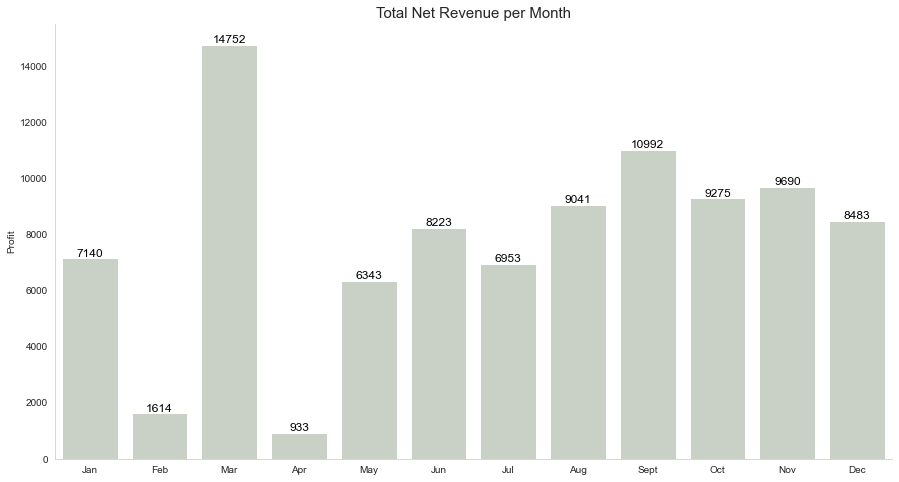

In [324]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.set_style('whitegrid')
chart = sns.barplot(x = month, y = monthly_net.Profit, ax = ax, color = '#c8d2c4')

for y in chart.patches:
             chart.annotate('%.0f' % y.get_height(), (y.get_x() + y.get_width() / 2., y.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Total Net Revenue per Month', fontsize=15)
plt.grid(visible=False)
sns.despine(left = False, right = True, bottom = False, top = True)
plt.show()

link [https://www.kaggle.com/code/hkhanh/us-e-commerce-cohort-analysis]